<a href="https://colab.research.google.com/github/movie112/DILAB/blob/main/220103/Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformer

https://www.youtube.com/watch?v=Yk1tV_cXMMU           
https://jalammar.github.io/illustrated-transformer/

- sequence를 한 번에 하나의 token씩 순서대로 처리하는 것이 아니라 한꺼번에 처리
- A model that uses attention to boost the speed with which these models can be trained and easy to parallelize

- architecture

<img src='https://lilianweng.github.io/lil-log/assets/images/transformer.png' width='500px'  align='center'> </img>


- A high-level look
  - RNN의 encoder-decoder 구조와 input, output은 같음

<img src='https://jalammar.github.io/images/t/the_transformer_3.png' width='400px' align='center'></img>

- transformer 안을 보면, encoding component, decoding components가 존재하고 연결 방식에서 RNN encdec와 차이가 있음 

<img src='https://jalammar.github.io/images/t/The_transformer_encoders_decoders.png' width='400px' align='center'></img>


## encoding decoding componenet
- encoding block, decoding block 6개씩

<img src="https://jalammar.github.io/images/t/The_transformer_encoder_decoder_stack.png" width="400px" align="center"></img>

- encoder는 모든 seqence 사용하는 **Unmasked**
- decoder는 **Masked**
  - 문장을 만들 때 뒷 단어를 먼저 만들고 앞 단어를 만들 수 없으니까

<img src="https://jalammar.github.io/images/t/Transformer_decoder.png" width="400px" align="center"></img>


### encoder
- 각각의 encoder는 구조는 같으나 가중치를 share하는 개념 X
- 2개의 sub-layers 로 구성
  1. self-attention layer : 어떤 토큰(단어)의 정보를 처리할 때, input sequence의 다른 토큰들을 얼마나 중요하게 볼 것인가
  2. feed-forward NN
  - 각 word의 position 유지, self attention -> 각각 NN 통과한 output

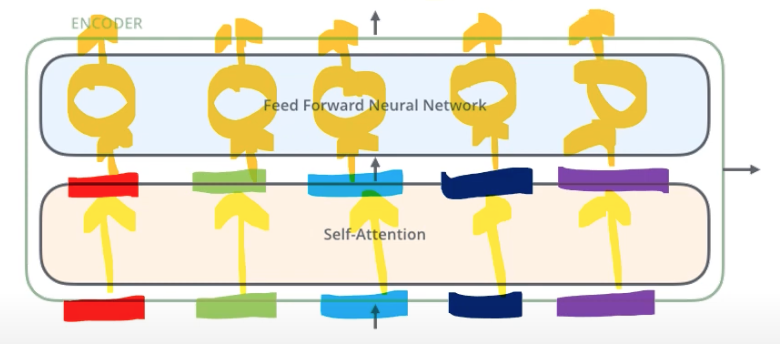

### decoder
1. self-attention
2. encoder-decoder attention
  - 최종 output을 생성할 때, encoder에서 주어지는 정보를 어떻게 반영할 것인지
3. feed forward

## Encoding block
- encoder의 input -> input embedding
  - 첫 번째 encoder block의 Input만 word embedding이고, 나머지는 이전 encoder의 output
  - 따라서, input의 size 계속 유지

### positional encoding
- 전체 sequence가 한 번에 들어가서 각 단어의 위치(순서) 정보 손실
  - **positional encoding**(vector) 으로 어느정도 해결 : 위치 정보 반영하는 장치
  - input embedding (+) positional encoding

<img src='https://jalammar.github.io/images/t/transformer_positional_encoding_example.png' width='500px' align='center'></img>

- 목적
1. the norm of encoding vecotr is the same for all positions
2. the further th two positions, the larger the distance

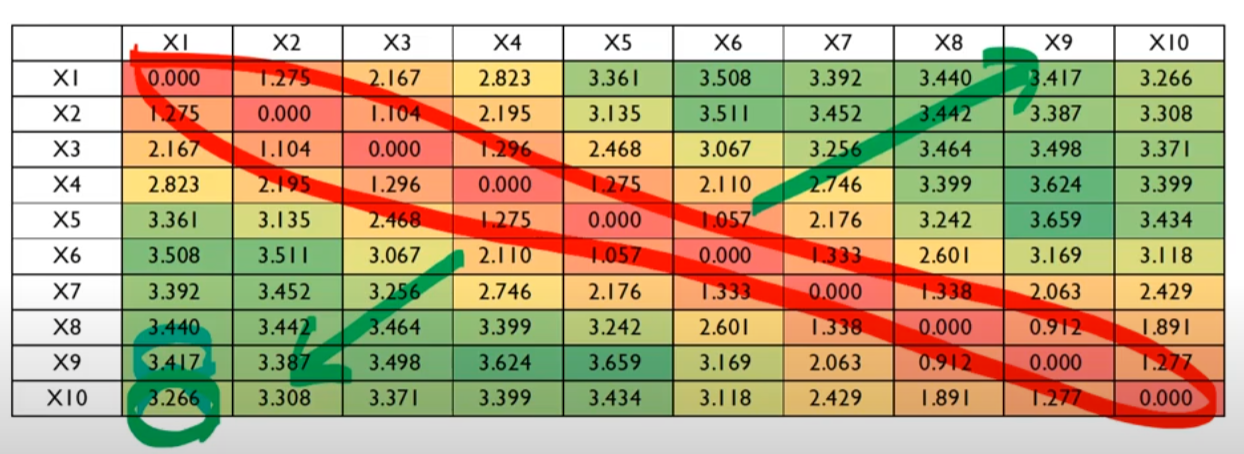

  - 대각행렬(자기자신)에서 멀어질수록 큰 값
    - 완벽하진 않지만 어느정도는 

### multi-head attention

<img src='https://jalammar.github.io/images/t/encoder_with_tensors_2.png' width='500px' align='500px'></img>

- there are dependencies between these paths in the self-attention layer
  - dependency O 서로서로 연관됨
- the feed-forward layer does not have those dependencies (parallelization becomes possible)
  - dependency X

### self-attention 
- ex. input sentence to translate:
  - The animal did't cross the street because **it** was too tired
- what does **"it"** refer to? *street* or *animal*?
- self-attention allows it to look at other positions in the input sequence for clues that can help lead to a better encoding for ths word
- self-attentin is the method the Transformer uses to bake the **"understanding"** of other **relevant words** into the one we're currently processing

#### step 1. 각 input vectors에 대해 2가지 vector를 생성한다. -> input embedding으로부터
  1. Query
    - representation of the current word 
    - 다른 단어들을 scoring하는데 기준이 되는 값
    - we only care about the query of the token we're currently processing
  2. Key
    - 마치 label 같은 역할
    - they're what we match against in our search for relevant words
  3. Value
    - actual word representation
- Query와 Key를 통해서 가장 적절한 Value를 찾겠다!

<img src='https://jalammar.github.io/images/t/transformer_self_attention_vectors.png' width='500px' align='center'></img>

- note) encoder input vectors dim 보다 Q, K, V의 dim을 더 적게 잡음
  - multi-head attention 을 위해

#### step 2. calculate a score
- 현재 위치에 해당하는 q1와 나+나머지 것들에 해당하는 k 값들을 곱해준다.

 <img src='https://jalammar.github.io/images/t/self-attention_softmax.png' width='500px' align='center'></img>





#### step 3. dim의 제곱근으로 나눈다.
- this lead to having more stable gradients



#### step 4. softmax 통과
- 단어들이 현재 위치의 토큰에 얼마나 중요한 역할을 하는가 의미

#### step 5. multiply each value vector by the softmax score
- value X softmax score

 <img src='https://jalammar.github.io/images/t/self-attention-output.png' width='500px' align='center'></img>




#### step 6. sum up the weighted value vector which prduces the ouptput of the self-attention layer at this position
- v1 + v2 
  - softmax에 의해 가중합이 된 value 값들을 첫 번째 토큰의 self-attention layer의 output으로 쓰겠다.

  <img src='https://jalammar.github.io/images/gpt2/gpt2-value-vector-sum.png' width='500px' align='center'></img>


 -  matrix calculation of selt-attention

 <img src='https://jalammar.github.io/images/t/self-attention-matrix-calculation.png' width='300px' align='left'></img>

  <img src='https://jalammar.github.io/images/t/self-attention-matrix-calculation-2.png' width='400px' align='left'></img>


                      z1   z2   z3   z4    
3) sum     
2) score     
1) create q,k,v    

                      x1   x2   x3   x4    


### Multi-head attention
- expand the model's ability to focus on different positions
  - x가 어떤 단어 볼지 여러 개의 다른 경우의 수 허용, attention head 다수 사용

<img src='https://jalammar.github.io/images/t/transformer_attention_heads_z.png' width='500px' align='center'></img>

- 각각의 개별적인 attention을 만들어서 전부 concat
- 처음 input dim 과 동일한 output z를 생성!!

<img src='https://jalammar.github.io/images/t/transformer_attention_heads_weight_matrix_o.png' width='500px' align='center'></img>

<img src='https://jalammar.github.io/images/t/transformer_multi-headed_self-attention-recap.png' width='600px' align='center'></img>

<img src='https://jalammar.github.io/images/t/transformer_self-attention_visualization.png' width='300px' align='center'></img>
- As we are encoding the word "it" in encoder #5 (the top encoder in the stack), part of the attention mechanism was focusing on "The Animal", and baked a part of its representation into the encoding of "it".


<img src='https://jalammar.github.io/images/t/transformer_self-attention_visualization_2.png' width='300px' align='center'></img>
- As we encode the word "it", one attention head is focusing most on "the animal", while another is focusing on "tired" -- in a sense, the model's representation of the word "it" bakes in some of the representation of both "animal" and "tired".

<img src='https://jalammar.github.io/images/t/transformer_self-attention_visualization_3.png' width='300px' align='center'></img>
- If we add all the attention heads to the picture, however, things can be harder to interpret:

### residual connection & normalization


<img src='https://jalammar.github.io/images/t/transformer_resideual_layer_norm_2.png' width='400px' align='center'></img>
1. residual
  - f(x) + x -> 입력의 output에 자기자신을 더함 
  - -> f'(x) + 1 -> f'(x) 값이 아무리 작아도 1이 있어서 소실 막음으로써 학습에 유리
2. normalization



### position-wise feed-forward networks
- fully connected feed-forward network
- 각각의 position에 대해 독립적으로 적용
- FFN(x) = max(0, xW1 + b1)W2 + b2
- layer 마다 다른 parameters,,
  - block 내에서는 동일한 parameters

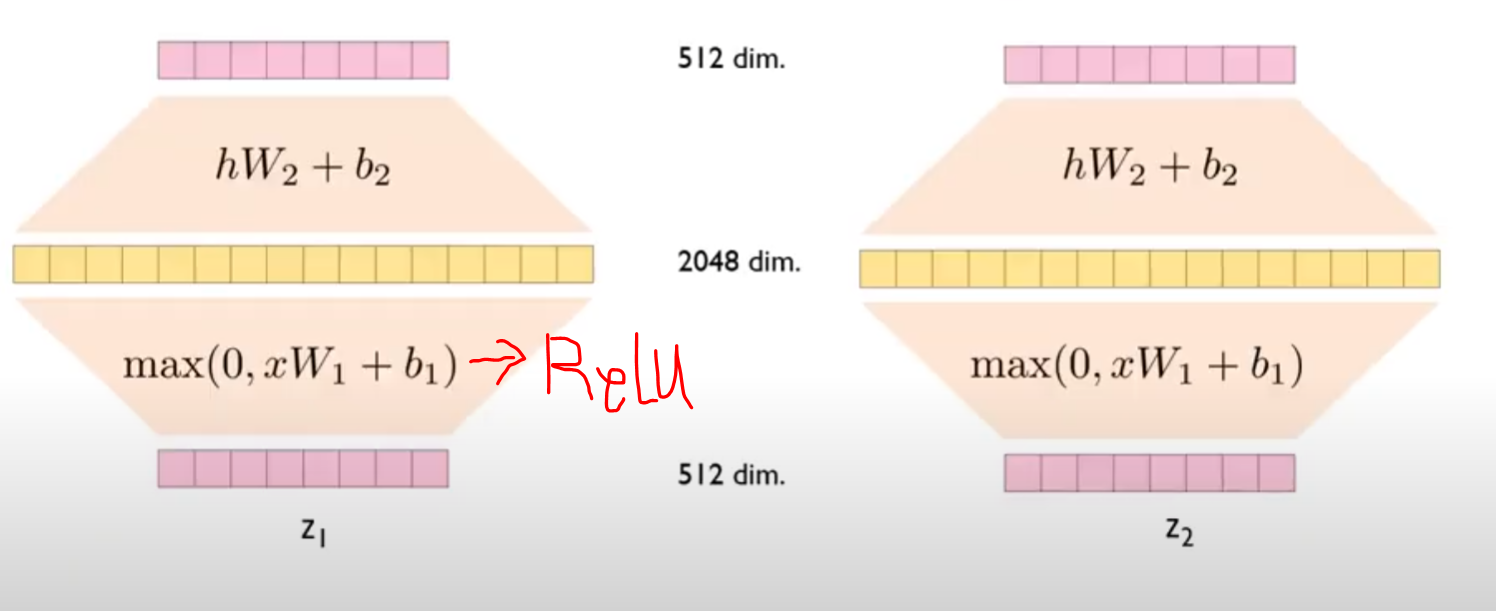

- another way of describing this is as two convolutions with kernel size 1
  

## Decoding block


### masked multi-head attention
- decoder의 self attention layers는 earlier positions의 attention score만을 볼 수 있다.
  - 뒤는 -inf 로 masking
   

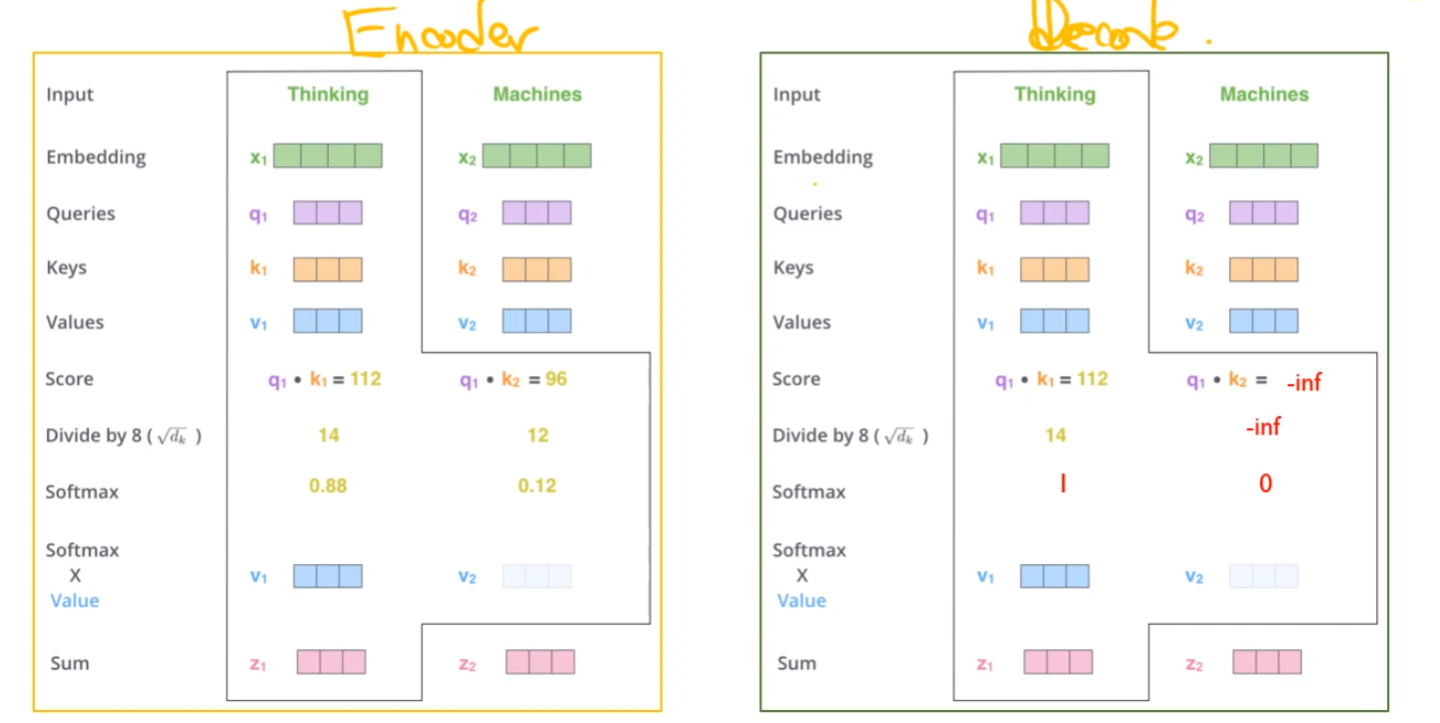

<img src='https://jalammar.github.io/images/gpt2/queries-keys-attention-mask.png' width='500px' align='center'></img>

<img src='https://jalammar.github.io/images/gpt2/transformer-attention-mask.png' width='500px' align='center'></img>

<img src='https://jalammar.github.io/images/gpt2/transformer-attention-masked-scores-softmax.png' width='500px' align='center'></img>

### multi-head attention with encoder outputs
- 가장 윗단의 encoder의 출력은 attention 벡터들인 K와 V로 변형
- 각 decoder의 “encoder-decoder attention” layer에서 decoder 가 입력 시퀀스에서 적절한 position에 focus 도움

<img src='https://nlpinkorean.github.io/images/transformer/transformer_decoding_1.gif' width='500px' align='center'></img>

-  decoding 단계의 각 스텝은 출력 시퀀스의 한 element를 출력
- 디코딩 스텝은 decoder가 출력을 완료했다는 special 기호인 <end of sentence>를 출력할 때까지 반복
- 각 스텝마다의 출력된 단어는 다음 스텝의 가장 밑단의 decoder에 들어가고 encoder와 마찬가지로 여러 개의 decoder를 거침
- encoder의 입력에 했던 것과 동일하게 embed를 한 후 positional encoding을 추가하여 decoder에게 각 단어의 위치 정보를 더함

<img src='https://nlpinkorean.github.io/images/transformer/transformer_decoding_2.gif' width='500px' align='center'></img>

- Decoder에서의 self-attention layer은 output sequence 내에서 현재 위치의 이전 위치들에 대해서만 attend 할 수 있습니다. 이것은 self-attention 계산 과정에서 softmax를 취하기 전에 현재 스텝 이후의 위치들에 대해서 masking (즉 그에 대해서 -inf로 치환하는 것)을 해줌으로써 가능해집니다.

- “Encoder-Decoder Attention” layer 은 multi-head self-attention 과 한 가지를 제외하고는 똑같은 방법으로 작동하는데요, 그 한가지 차이점은 Query 행렬들을 그 밑의 layer에서 가져오고 Key 와 Value 행렬들을 encoder의 출력에서 가져온다는 점입니다.

### The final linear and softmax layer
- linear layer : a simple fully connected neural network that projects the vector produced by the stack of decoders intp a much larger vector called a logits vector
- softmax layer : turns those scores into probability

<img src='https://nlpinkorean.github.io/images/transformer/transformer_decoder_output_softmax.png' width='500px' align='center'></img>

### BELU

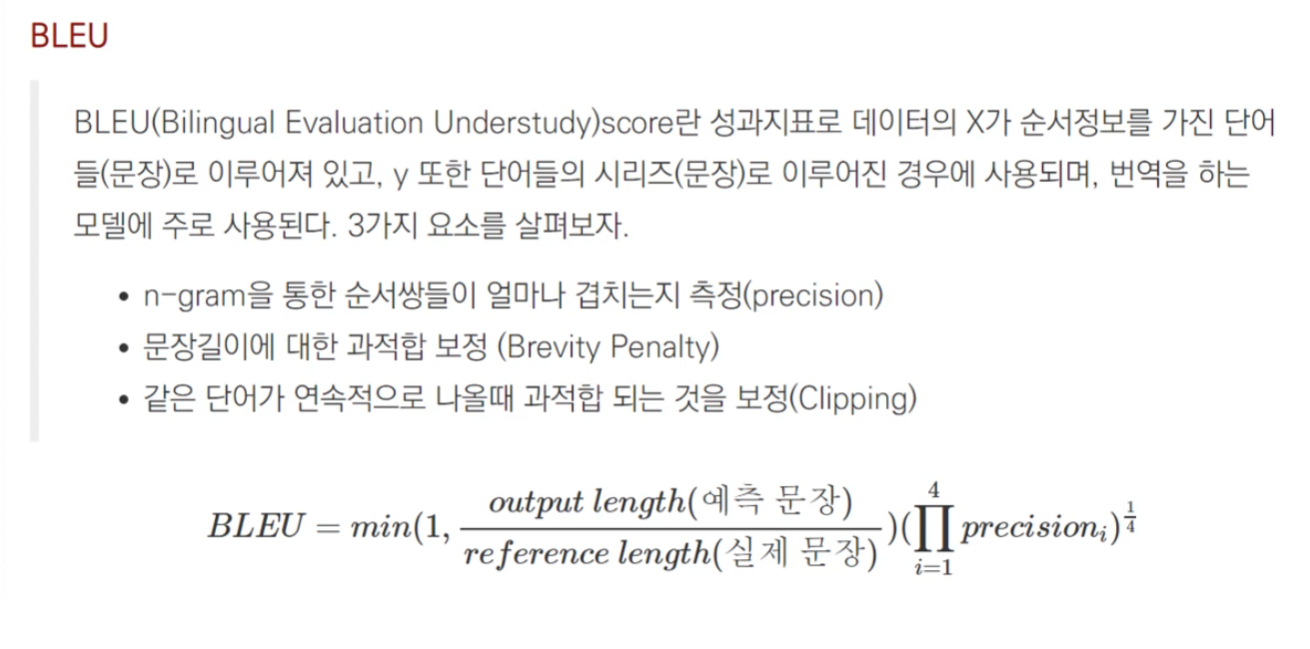